In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np

In [2]:
df = pd.read_csv('veri-seti.csv')

df.head()

,Pregnant Number,Plasma Glucose,Diolastic Blood Pressure(mm Hg),Triceps Skinfold Thickness(mm),2-Hours Serum Insulin(mu U/ml),Body Mass Index,Diabetes Pedigree Function,Age,Diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop(columns=['Diabet'])
y = df['Diabet']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [800, 900]
}

MLP

In [7]:
# Initialize and fit GridSearchCV for MLP
mlp = MLPClassifier(random_state=24)
mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
mlp_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=24), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50, 50), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [800, 900], 'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [8]:
# Get the best estimator
best_mlp = mlp_grid_search.best_estimator_

# Predictions
mlp_train_pred = best_mlp.predict(X_train_scaled)
mlp_test_pred = best_mlp.predict(X_test_scaled)

In [9]:
# Confusion matrices
mlp_train_cm = confusion_matrix(y_train, mlp_train_pred)
mlp_test_cm = confusion_matrix(y_test, mlp_test_pred)

In [10]:
# Classification reports
mlp_train_cr = classification_report(y_train, mlp_train_pred, output_dict=True)
mlp_test_cr = classification_report(y_test, mlp_test_pred, output_dict=True)

In [11]:
# ROC AUC scores
mlp_train_roc_auc = roc_auc_score(y_train, best_mlp.predict_proba(X_train_scaled)[:,1])
mlp_test_roc_auc = roc_auc_score(y_test, best_mlp.predict_proba(X_test_scaled)[:,1])

In [21]:
mlp_results = {
    "test_cm": mlp_test_cm,
    "test_cr": mlp_test_cr,
    "test_roc_auc": mlp_test_roc_auc
}

mlp_results

{'test_cm': array([[116,  24],
        [ 39,  52]], dtype=int64),
 'test_cr': {'0': {'precision': 0.7483870967741936,
   'recall': 0.8285714285714286,
   'f1-score': 0.7864406779661017,
   'support': 140},
  '1': {'precision': 0.6842105263157895,
   'recall': 0.5714285714285714,
   'f1-score': 0.622754491017964,
   'support': 91},
  'accuracy': 0.7272727272727273,
  'macro avg': {'precision': 0.7162988115449915,
   'recall': 0.7,
   'f1-score': 0.7045975844920329,
   'support': 231},
  'weighted avg': {'precision': 0.7231054175027011,
   'recall': 0.7272727272727273,
   'f1-score': 0.7219582406835021,
   'support': 231}},
 'test_roc_auc': 0.8002354788069075}

In [13]:
from sklearn.metrics import roc_curve

mlp_train_fpr, mlp_train_tpr, _ = roc_curve(y_train, best_mlp.predict_proba(X_train_scaled)[:, 1])
mlp_test_fpr, mlp_test_tpr, _ = roc_curve(y_test, best_mlp.predict_proba(X_test_scaled)[:, 1])

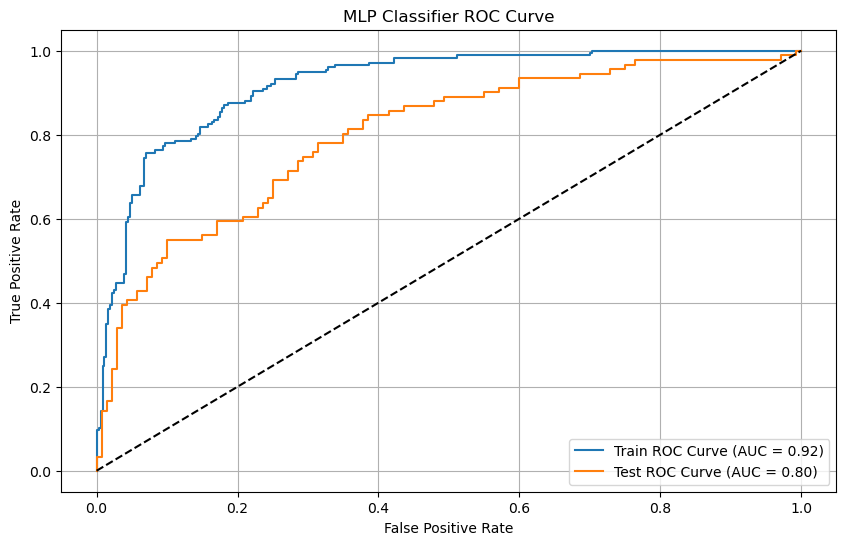

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mlp_train_fpr, mlp_train_tpr, label=f'Train ROC Curve (AUC = {mlp_train_roc_auc:.2f})')
plt.plot(mlp_test_fpr, mlp_test_tpr, label=f'Test ROC Curve (AUC = {mlp_test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Referans için köşegen çizgi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifier ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

SVM

In [15]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True, random_state=33)
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=33), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [17]:
best_svm = svm_grid_search.best_estimator_

# Tahminler
svm_train_pred = best_svm.predict(X_train_scaled)
svm_test_pred = best_svm.predict(X_test_scaled)


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Confusion matrices
svm_train_cm = confusion_matrix(y_train, svm_train_pred)
svm_test_cm = confusion_matrix(y_test, svm_test_pred)

# Classification reports
svm_train_cr = classification_report(y_train, svm_train_pred, output_dict=True)
svm_test_cr = classification_report(y_test, svm_test_pred, output_dict=True)

# ROC AUC scores
svm_train_roc_auc = roc_auc_score(y_train, best_svm.predict_proba(X_train_scaled)[:,1])
svm_test_roc_auc = roc_auc_score(y_test, best_svm.predict_proba(X_test_scaled)[:,1])

# ROC curve data
svm_train_fpr, svm_train_tpr, _ = roc_curve(y_train, best_svm.predict_proba(X_train_scaled)[:, 1])
svm_test_fpr, svm_test_tpr, _ = roc_curve(y_test, best_svm.predict_proba(X_test_scaled)[:, 1])


In [23]:
svm_results = {
    "test_cm": svm_test_cm,
    "test_cr": svm_test_cr,
    "test_roc_auc": svm_test_roc_auc,
}

svm_results

{'test_cm': array([[128,  12],
        [ 44,  47]], dtype=int64),
 'test_cr': {'0': {'precision': 0.7441860465116279,
   'recall': 0.9142857142857143,
   'f1-score': 0.8205128205128205,
   'support': 140},
  '1': {'precision': 0.7966101694915254,
   'recall': 0.5164835164835165,
   'f1-score': 0.6266666666666667,
   'support': 91},
  'accuracy': 0.7575757575757576,
  'macro avg': {'precision': 0.7703981080015767,
   'recall': 0.7153846153846154,
   'f1-score': 0.7235897435897436,
   'support': 231},
  'weighted avg': {'precision': 0.764837973746133,
   'recall': 0.7575757575757576,
   'f1-score': 0.7441491841491841,
   'support': 231}},
 'test_roc_auc': 0.8175824175824175}

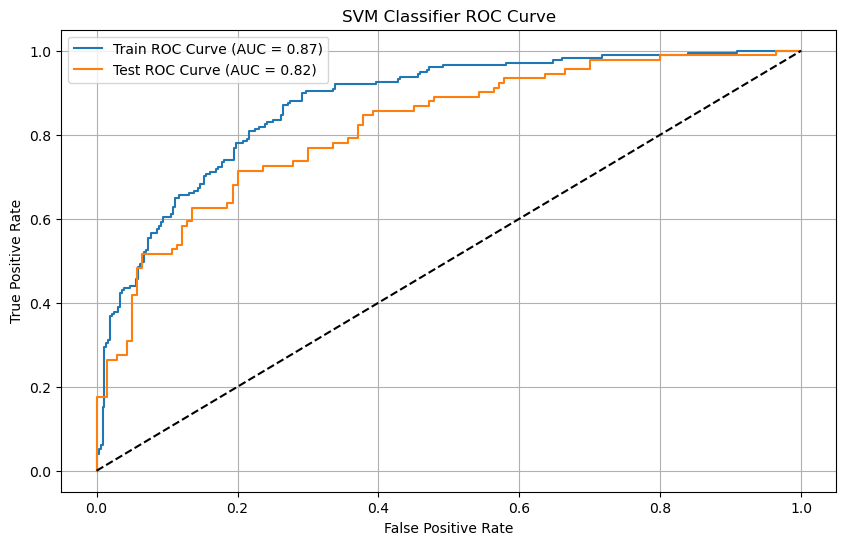

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(svm_train_fpr, svm_train_tpr, label=f'Train ROC Curve (AUC = {svm_train_roc_auc:.2f})')
plt.plot(svm_test_fpr, svm_test_tpr, label=f'Test ROC Curve (AUC = {svm_test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Referans için köşegen çizgi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()
